# Análise das séries temporais de COVID

## Bibliotecas e pacotes necessários

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura de dados

In [32]:
dir_covid_data = '../../datalake/silver/covid_data/'
covid_file = f'{dir_covid_data}/covid_19_clean_complete_filtro_1.csv'
covid_data = pd.read_csv(covid_file)

Setando coluna de datas como índice do Dataframe.

In [33]:
covid_data.drop('Unnamed: 0', axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
# covid_data.set_index('Date', inplace=True)
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Argentina,-38.416100,-63.61670,2020-01-22,0,0,0,0,Americas
1,NaN,Chile,-35.675100,-71.54300,2020-01-22,0,0,0,0,Americas
2,NaN,Ecuador,-1.831200,-78.18340,2020-01-22,0,0,0,0,Americas
3,NaN,Mexico,23.634500,-102.55280,2020-01-22,0,0,0,0,Americas
4,NaN,Spain,40.463667,-3.74922,2020-01-22,0,0,0,0,Europe


Número de países

In [11]:
covid_data['Country/Region'].unique()

array(['Argentina', 'Chile', 'Ecuador', 'Mexico', 'Spain'], dtype=object)

In [12]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [37]:
covid_data.iloc[0]['Date']

Timestamp('2020-01-22 00:00:00')

## Total de casos diário

In [45]:
def lineplot(plot_data=None, x_col=None, y_col=None, hue_col=None,
             figsize=(10,6), xlim=None, title='', ylim=None):
    fig, ax = plt.subplots(1, figsize=figsize)
    sns.lineplot(data=plot_data, x=x_col, y=y_col, hue=hue_col, ax=ax)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title, fontsize=14)

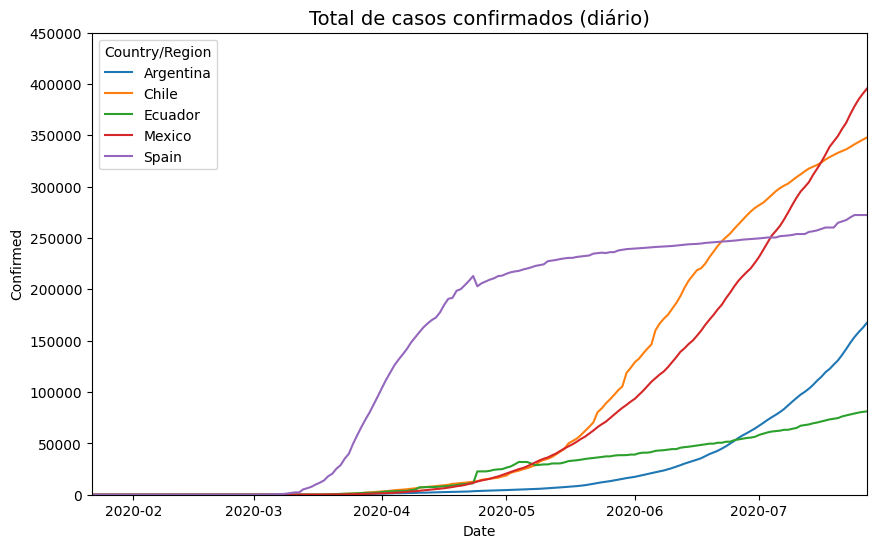

In [46]:
lineplot(plot_data=covid_data, x_col='Date', y_col='Confirmed',
         hue_col='Country/Region',
         title='Total de casos confirmados (diário)',
         xlim=(covid_data.iloc[0]['Date'], covid_data.iloc[-1]['Date']),
         ylim=(0, 450_000))

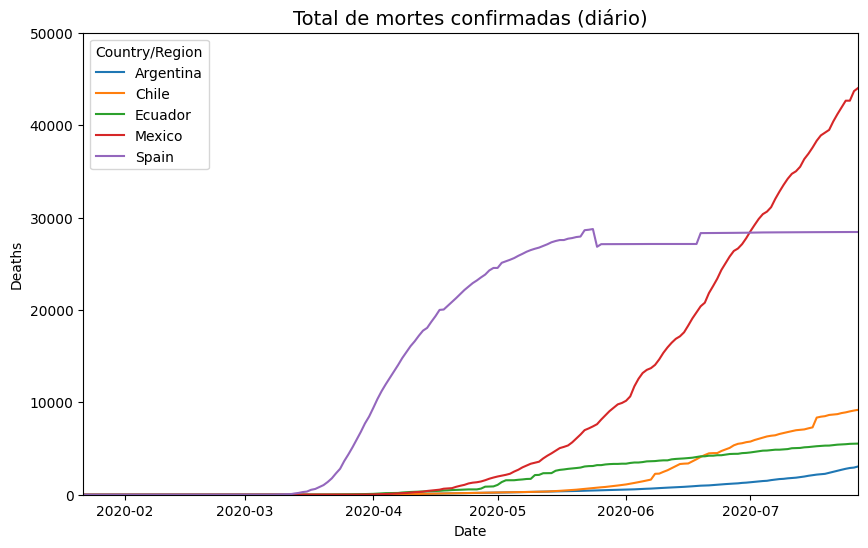

In [49]:
lineplot(plot_data=covid_data, x_col='Date', y_col='Deaths',
         hue_col='Country/Region',
         title='Total de mortes confirmadas (diário)',
         xlim=(covid_data.iloc[0]['Date'], covid_data.iloc[-1]['Date']),
         ylim=(0, 50_000))

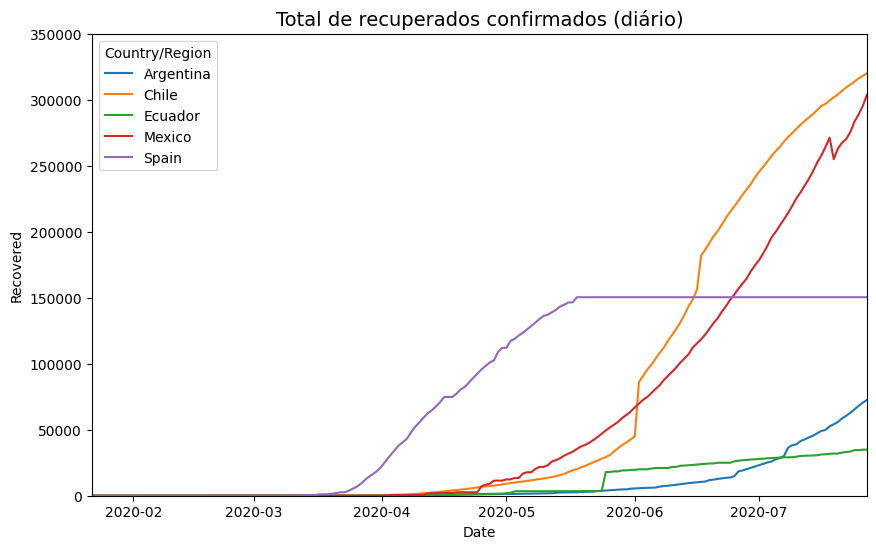

In [51]:
lineplot(plot_data=covid_data, x_col='Date', y_col='Recovered',
         hue_col='Country/Region',
         title='Total de recuperados confirmados (diário)',
         xlim=(covid_data.iloc[0]['Date'], covid_data.iloc[-1]['Date']),
         ylim=(0, 350_000))

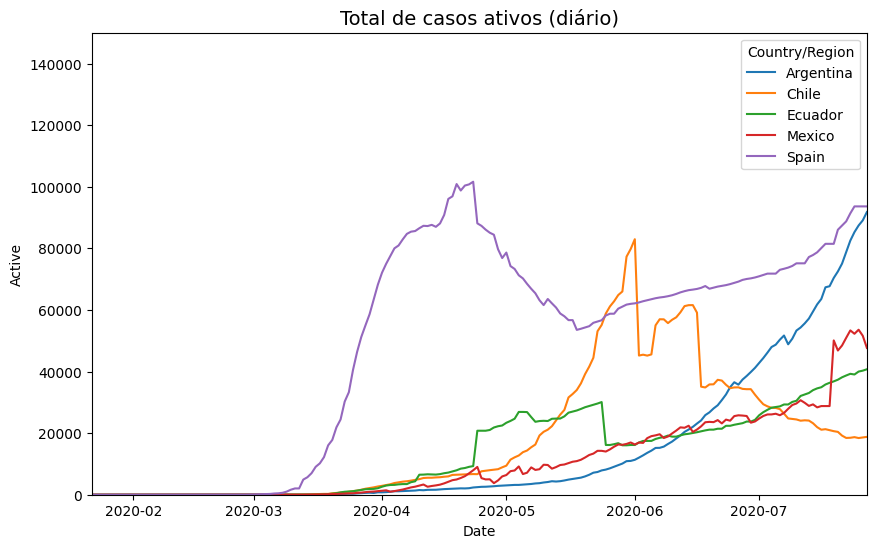

In [53]:
lineplot(plot_data=covid_data, x_col='Date', y_col='Active',
         hue_col='Country/Region',
         title='Total de casos ativos (diário)',
         xlim=(covid_data.iloc[0]['Date'], covid_data.iloc[-1]['Date']),
         ylim=(0, 150_000))

## Cálculo dos casos diários por país

In [68]:
covid_data.set_index('Date', inplace=True)
covid_data.head()

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,,
2020-01-22,NaN,Argentina,-38.416100,-63.61670,0,0,0,0,Americas
2020-01-22,NaN,Chile,-35.675100,-71.54300,0,0,0,0,Americas
2020-01-22,NaN,Ecuador,-1.831200,-78.18340,0,0,0,0,Americas
2020-01-22,NaN,Mexico,23.634500,-102.55280,0,0,0,0,Americas
2020-01-22,NaN,Spain,40.463667,-3.74922,0,0,0,0,Europe


In [77]:
daily_cases = covid_data.groupby('Country/Region')['Confirmed'].diff(1)
daily_deaths = covid_data.groupby('Country/Region')['Deaths'].diff(1)
daily_recovered = covid_data.groupby('Country/Region')['Recovered'].diff(1)
daily_active = covid_data.groupby('Country/Region')['Active'].diff(1)
covid_data['DailyCases'] = daily_cases
covid_data['DailyDeaths'] = daily_deaths
covid_data['DailyRecovered'] = daily_recovered
covid_data['DailyActive'] = daily_active
covid_data.head()

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,DailyCases,DailyDeaths,DailyRecovered,DailyActive
Date,,,,,,,,,,,,,
2020-01-22,NaN,Argentina,-38.416100,-63.61670,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Chile,-35.675100,-71.54300,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Ecuador,-1.831200,-78.18340,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Mexico,23.634500,-102.55280,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Spain,40.463667,-3.74922,0,0,0,0,Europe,NaN,NaN,NaN,NaN


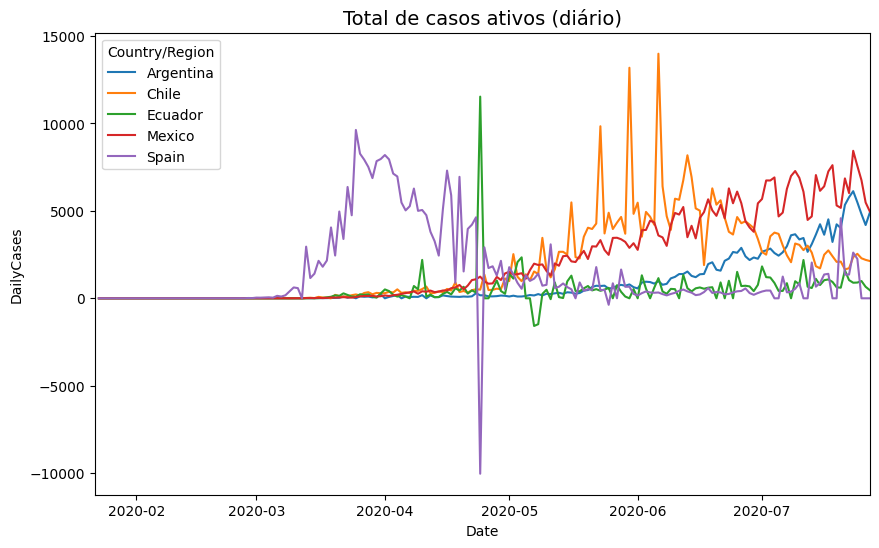

In [78]:
lineplot(plot_data=covid_data.reset_index(), x_col='Date', y_col='DailyCases',
         hue_col='Country/Region',
         title='Total de casos ativos (diário)',
         xlim=(covid_data.index[0], covid_data.index[-1]),
         )

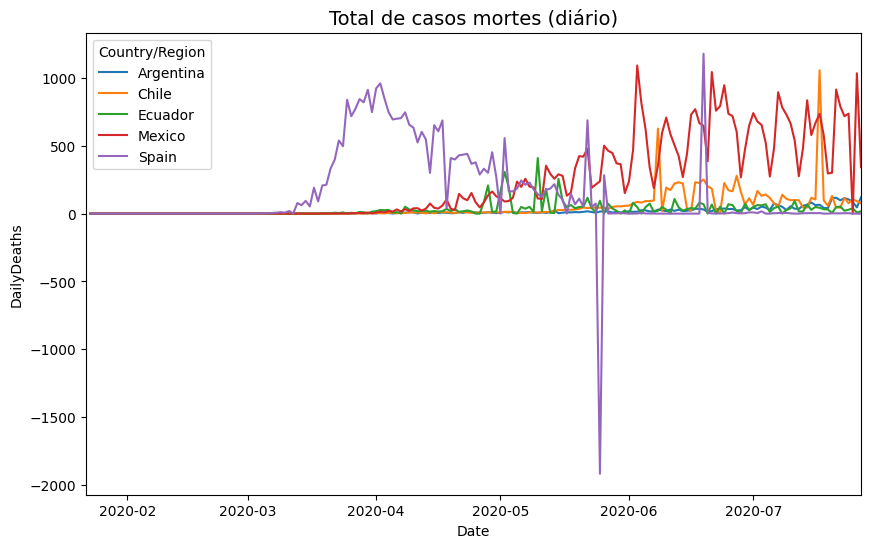

In [79]:
lineplot(plot_data=covid_data.reset_index(), x_col='Date', y_col='DailyDeaths',
         hue_col='Country/Region',
         title='Total de casos mortes (diário)',
         xlim=(covid_data.index[0], covid_data.index[-1]),
         )

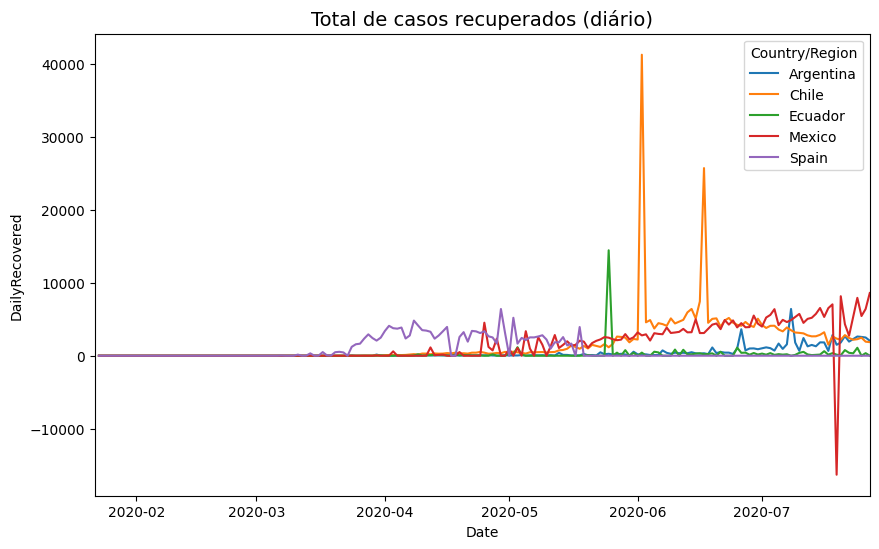

In [80]:
lineplot(plot_data=covid_data.reset_index(), x_col='Date', y_col='DailyRecovered',
         hue_col='Country/Region',
         title='Total de casos recuperados (diário)',
         xlim=(covid_data.index[0], covid_data.index[-1]),
         )

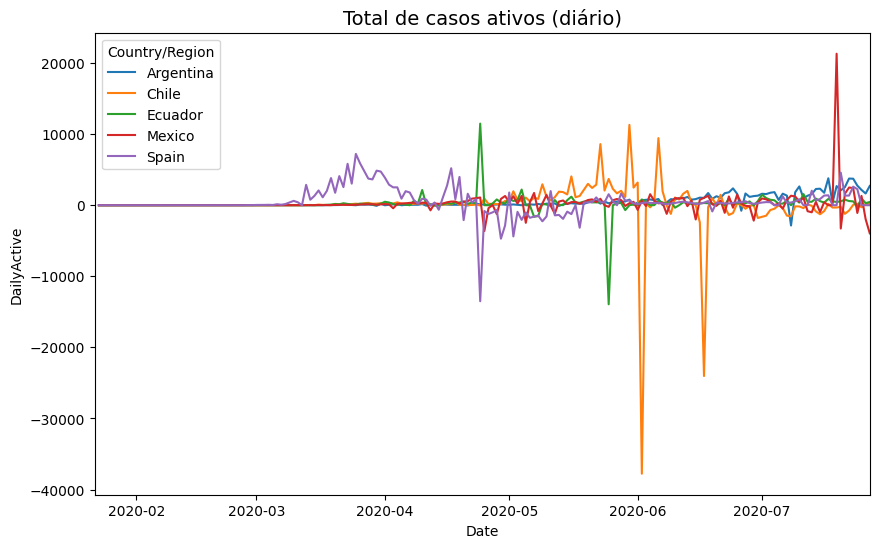

In [81]:
lineplot(plot_data=covid_data.reset_index(), x_col='Date', y_col='DailyActive',
         hue_col='Country/Region',
         title='Total de casos ativos (diário)',
         xlim=(covid_data.index[0], covid_data.index[-1]),
         )

In [83]:
covid_data.groupby('Country/Region')[['Confirmed']].describe()

Confirmed                                                       \
                   count           mean            std  min     25%       50%   
Country/Region                                                                  
Argentina          188.0   23673.712766   40135.612069  0.0   12.00    3693.5   
Chile              188.0   90083.265957  120742.552886  0.0   20.00   13855.5   
Ecuador            188.0   24885.617021   25820.843112  0.0   14.75   22719.0   
Mexico             188.0   79501.074468  113343.248204  0.0    7.00   13357.0   
Spain              188.0  145766.196809  109213.935601  0.0  973.00  208011.5   

                                     
                      75%       max  
Country/Region                       
Argentina        26333.50  167416.0  
Chile           182471.00  347923.0  
Ecuador          44440.00   81161.0  
Mexico          130381.50  395489.0  
Spain           242386.75  272421.0

In [85]:
covid_data.groupby('Country/Region')[['DailyCases']].describe()

DailyCases                                                  \
                    count         mean          std      min  25%     50%   
Country/Region                                                              
Argentina           187.0   895.272727  1403.920879      0.0  0.0   143.0   
Chile               187.0  1860.550802  2365.184589      0.0  4.0   534.0   
Ecuador             187.0   434.016043   970.593192  -1583.0  0.0   225.0   
Mexico              187.0  2114.914439  2413.487292      0.0  1.0  1043.0   
Spain               187.0  1456.796791  2420.305624 -10034.0  1.5   442.0   

                                 
                   75%      max  
Country/Region                   
Argentina       1217.0   6127.0  
Chile           3263.5  13990.0  
Ecuador          615.0  11536.0  
Mexico          4098.5   8438.0  
Spain           1784.0   9630.0

In [86]:
covid_data.groupby('Country/Region')[['Deaths']].describe()

Deaths                                                   \
                count          mean           std  min    25%      50%   
Country/Region                                                           
Argentina       188.0    519.941489    737.997726  0.0   1.00    180.5   
Chile           188.0   1715.319149   2744.364326  0.0   0.00    177.5   
Ecuador         188.0   1843.712766   2008.481226  0.0   0.00    576.0   
Mexico          188.0   9192.962766  13242.633699  0.0   0.00   1263.0   
Spain           188.0  16133.138298  12486.386299  0.0  25.25  22713.0   

                                   
                     75%      max  
Country/Region                     
Argentina         742.50   3059.0  
Chile            2518.25   9187.0  
Ecuador          3720.00   5532.0  
Mexico          15503.75  44022.0  
Spain           27563.00  28752.0

In [87]:
covid_data.groupby('Country/Region')[['DailyDeaths']].describe()

DailyDeaths                                                    \
                     count        mean         std     min  25%   50%    75%   
Country/Region                                                                 
Argentina            187.0   16.358289   24.712649     0.0  0.0   7.0   22.0   
Chile                187.0   49.128342  106.092243     0.0  0.0   8.0   57.5   
Ecuador              187.0   29.582888   52.331011     0.0  0.0  13.0   40.0   
Mexico               187.0  235.411765  291.561658     0.0  0.0  93.0  431.5   
Spain                187.0  152.042781  307.735133 -1918.0  0.0   3.0  215.0   

                        
                   max  
Country/Region          
Argentina        120.0  
Chile           1057.0  
Ecuador          410.0  
Mexico          1092.0  
Spain           1179.0

In [88]:
covid_data.groupby('Country/Region')[['Active']].describe()

Active                                                    \
                count          mean           std  min     25%      50%   
Country/Region                                                            
Argentina       188.0  14217.473404  22795.492899  0.0   11.00   2510.0   
Chile           188.0  17662.664894  20690.241551  0.0   20.00   7159.0   
Ecuador         188.0  13615.255319  12932.965733  0.0   14.75  16047.0   
Mexico          188.0  11046.276596  13323.056719  0.0    5.00   5410.5   
Spain           188.0  49348.042553  34749.965119  0.0  916.25  63305.5   

                                    
                     75%       max  
Country/Region                      
Argentina       17514.75   91782.0  
Chile           29742.25   82961.0  
Ecuador         23970.50   40733.0  
Mexico          20020.75   53572.0  
Spain           75012.75  101617.0

In [89]:
covid_data.groupby('Country/Region')[['DailyActive']].describe()

DailyActive                                                \
                     count        mean          std      min  25%    50%   
Country/Region                                                             
Argentina            187.0  490.812834   854.661137  -2853.0  0.0   89.0   
Chile                187.0  100.438503  3641.949134 -37774.0  0.0   33.0   
Ecuador              187.0  217.823529  1390.399098 -13939.0  0.0  101.0   
Mexico               187.0  254.850267  1756.037511  -3957.0  0.0   45.0   
Spain                187.0  500.604278  1932.139258 -13506.0  0.0  249.0   

                                
                  75%      max  
Country/Region                  
Argentina       784.0   3792.0  
Chile           319.5  11302.0  
Ecuador         395.5  11482.0  
Mexico          487.0  21313.0  
Spain           855.0   7218.0

In [90]:
covid_data.groupby('Country/Region')[['Recovered']].describe()

Recovered                                                   \
                   count          mean            std  min   25%      50%   
Country/Region                                                              
Argentina          188.0   8936.297872   16778.380184  0.0   0.0   1003.0   
Chile              188.0  70705.281915  107680.255118  0.0   0.0   6536.5   
Ecuador            188.0   9426.648936   12375.199838  0.0   0.0   1366.0   
Mexico             188.0  59261.835106   87327.003184  0.0   1.0   4888.0   
Spain              188.0  80285.015957   67628.668604  0.0  31.5  94031.5   

                                     
                      75%       max  
Country/Region                       
Argentina         8076.25   72575.0  
Chile           122946.00  319954.0  
Ecuador          21862.00   34896.0  
Mexico           94747.00  303810.0  
Spain           150376.00  150376.0

In [91]:
covid_data.groupby('Country/Region')[['DailyRecovered']].describe()

DailyRecovered                                                 \
                        count         mean          std      min  25%    50%   
Country/Region                                                                 
Argentina               187.0   388.101604   808.369509      0.0  0.0   35.0   
Chile                   187.0  1710.983957  3846.676758      0.0  0.0  374.0   
Ecuador                 187.0   186.609626  1069.962517      0.0  0.0    0.0   
Mexico                  187.0  1624.652406  2540.751951 -16298.0  0.0   31.0   
Spain                   187.0   804.149733  1381.173795      0.0  0.0    0.0   

                                 
                   75%      max  
Country/Region                   
Argentina        340.5   6407.0  
Chile           2630.0  41227.0  
Ecuador          141.0  14443.0  
Mexico          3187.5   8588.0  
Spain           1651.0   6399.0

## Medidas de assimetria

<AxesSubplot:xlabel='DailyCases', ylabel='Count'>

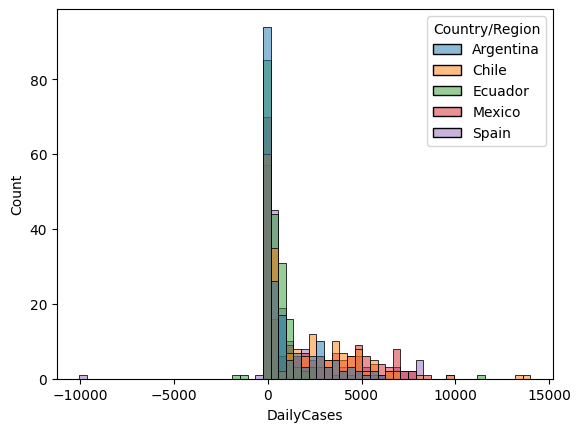

In [99]:
sns.histplot(data=covid_data.reset_index(),
             x='DailyCases', 
             hue='Country/Region')

## Coeficiente de assimetria

É definido como o terceiro momento ajustado sobre a média dividido pelo cubo do desvio padrão (s), e é expresso matematicamente da seguinte forma:

$$g = \frac{n}{(n-1) (n-2)}\sum_{i=1}^{n}\frac{(x_i - \bar{x})^3}{s^2}$$

Uma distribuição assimétrica positiva de séries temporais com cauda estendida direita tem um coeficiente de assimetria positivo, enquanto uma série temporal com distribuição assimétrica negativa com cauda estendida esquerda tem um coeficiente de assimetria negativo.

In [109]:
from scipy.stats import skew

for country in covid_data['Country/Region'].unique():
    print(country,
          skew(covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()))

Argentina 1.7781496431575026
Chile 1.9181005217916358
Ecuador 8.147338741689964
Mexico 0.8134154166204965
Spain 0.9421416234774486


**Curtose**
$$\gamma = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{(n-1)s^4}$$
A curtose para uma distribuição normal padrão é três.
Uma distribuição de alta curtose tem um pico mais nítido e caudas mais longas e gordas, enquanto uma distribuição de baixa curtose tem um pico mais arredondado e caudas mais curtas e finas. Distribuições com um excesso de curtose zero são chamadas de 'mesocúrticas' ou 'mesocurtóticas'. Por outro lado, as distribuições com um excesso de curtose positivo são chamadas de “leptocúrticas” ou “leptocurtóticas”.

In [110]:
from scipy.stats import kurtosis

for country in covid_data['Country/Region'].unique():
    print(country,
          kurtosis(covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()))

Argentina 2.3513742162624727
Chile 5.473464057113006
Ecuador 90.04356178032903
Mexico -0.7056353802671218
Spain 3.79663908808567


## 3. Decomposição da série temporal

### 3.1 Homogeneidade

In [ ]:
len(covid_data)

In [115]:
from scipy.stats import bartlett

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    a = dt.values[:62]
    b = dt.values[62:124]
    c = dt.values[124:]
    print(country, bartlett(a, b, c))

Argentina BartlettResult(statistic=591.584093852226, pvalue=3.460558769544547e-129)
Chile BartlettResult(statistic=401.2332513019182, pvalue=7.469757478227342e-88)
Ecuador BartlettResult(statistic=372.68472374014374, pvalue=1.181790501340061e-81)
Mexico BartlettResult(statistic=464.7920152974764, pvalue=1.1794954280248753e-101)
Spain BartlettResult(statistic=121.67260422560071, pvalue=3.794282764176456e-27)


### 3.2 Estacionariedade

In [117]:
from scipy.stats import mannwhitneyu

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    a = dt.values[:98]
    b = dt.values[98:]
    print(country, mannwhitneyu(a, b))

Argentina MannwhitneyuResult(statistic=103.5, pvalue=3.466291271095012e-31)
Chile MannwhitneyuResult(statistic=6.0, pvalue=1.97063307803941e-32)
Ecuador MannwhitneyuResult(statistic=1615.0, pvalue=4.465273593667154e-14)
Mexico MannwhitneyuResult(statistic=2.0, pvalue=1.8392769320968414e-32)
Spain MannwhitneyuResult(statistic=4615.5, pvalue=0.48934919362163565)


### 3.3 Tendência

In [118]:
import pymannkendall as mk

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    print(country, mk.original_test(dt))

Argentina Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=17.665010475130636, Tau=0.8617675809326664, s=14987.0, var_s=719687.0, slope=12.161538461538461, intercept=-988.0230769230768)
Chile Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.995734499756848, Tau=0.6841469725720201, s=11898.0, var_s=722576.0, slope=18.930555555555557, intercept=-1226.5416666666667)
Ecuador Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.052300702030799, Tau=0.5351618653326433, s=9307.0, var_s=708958.3333333334, slope=4.725274725274725, intercept=-214.45054945054943)
Mexico Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=18.06881696195152, Tau=0.883617963314358, s=15367.0, var_s=723206.3333333334, slope=38.573913043478264, intercept=-2544.3739130434788)
Spain Mann_Kendall_Test(trend='no trend', h=False, p=0.07312407685176492, z=1.7920554956967052, Tau=0.08768903455810477, s=1525.0, var_s=723214.3333333334, slope=1.1818181818181819, intercept=332.09090909090907)


#### 3.4.1 Autocorrelação - ACF

Na ACF comparamos o valor presente com valores do passado da mesma série.

$$\rho(X_t, X_{t-k}) = \rho_k = \frac{Cov(X_t , X_{t-k})}{V(X_t)}$$

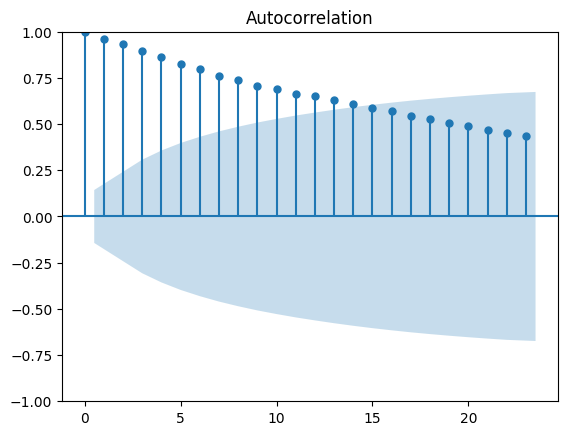

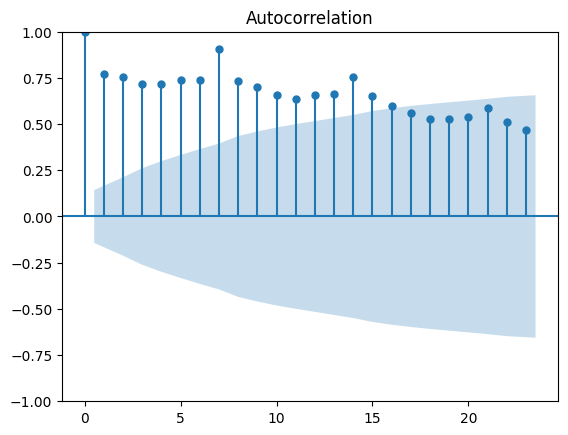

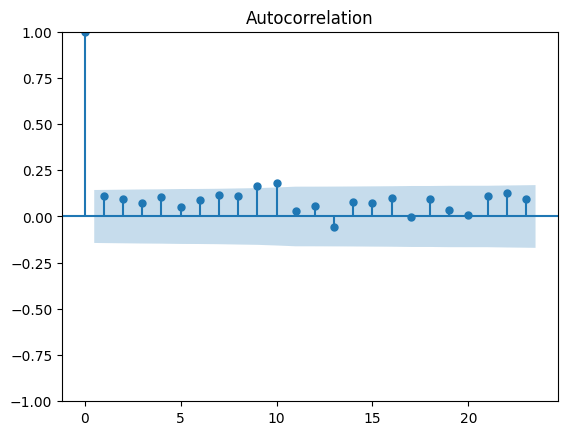

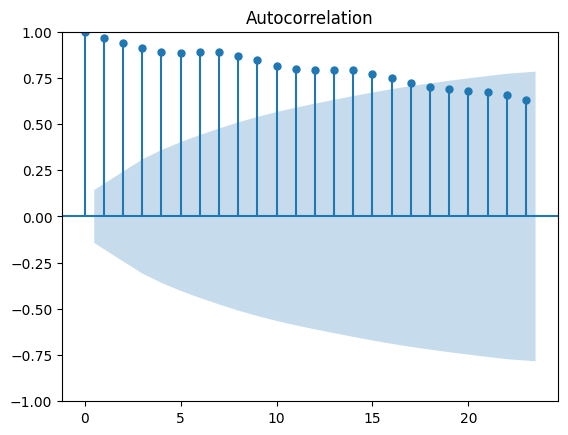

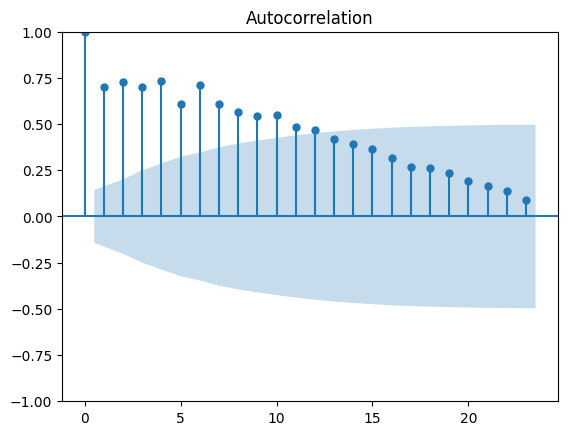

In [122]:
from statsmodels.graphics.tsaplots import plot_acf

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    plot_acf(dt)


#### 3.4.2 Autocorrelação parcial - PACF

A diferença entre a ACF e a PACF é que na ACF temos a correlação direta e indireta e na PCAF apenas a direta. Por exemplo, na ACF vemos a correlação direta do mês de janeiro em março também a correlação indireta que o o mês de janeiro teve em fevereiro que tabém teve em março.

$$X_t = \phi_{21} X_{t-1} + \phi_{22}S_{t-2} + e_t$$


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


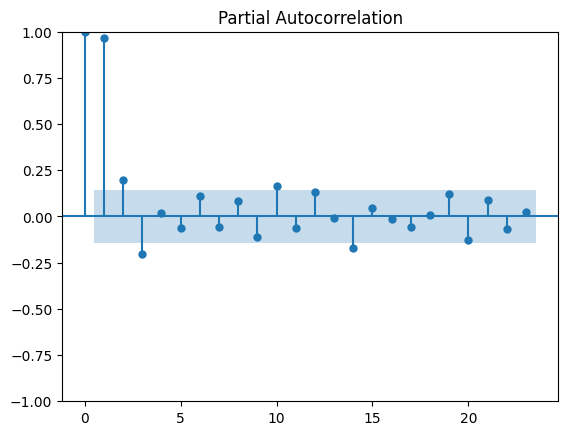

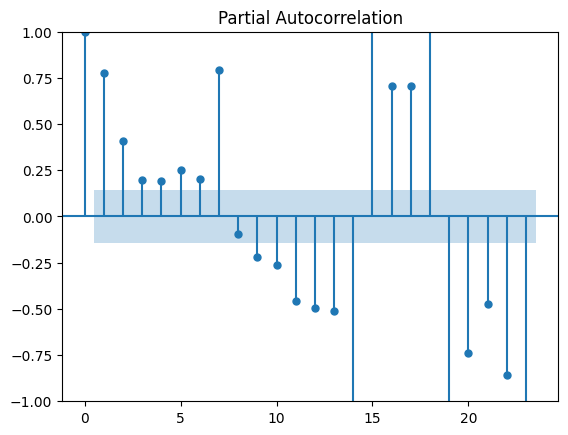

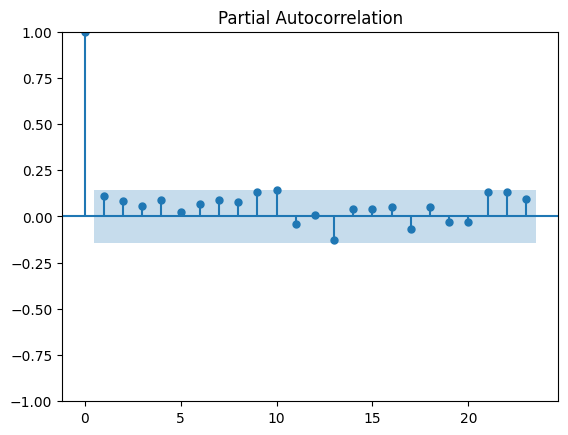

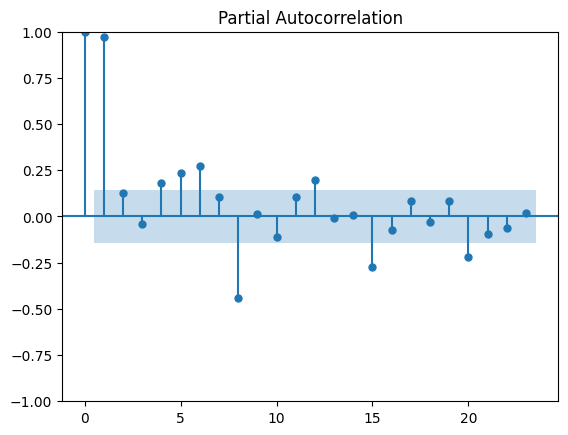

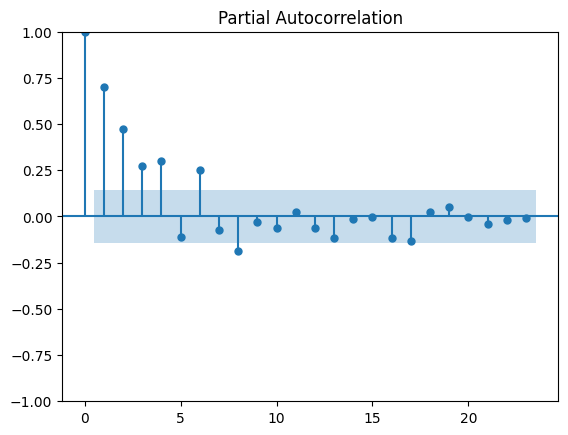

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    plot_pacf(dt)


Transformada de Fourier

[187.          93.5         62.33333333  46.75        37.4
  31.16666667  26.71428571  23.375       20.77777778  18.7
  17.          15.58333333  14.38461538  13.35714286  12.46666667
  11.6875      11.          10.38888889   9.84210526   9.35
   8.9047619    8.5          8.13043478   7.79166667   7.48
   7.19230769   6.92592593   6.67857143   6.44827586   6.23333333
   6.03225806   5.84375      5.66666667   5.5          5.34285714
   5.19444444   5.05405405   4.92105263   4.79487179   4.675
   4.56097561   4.45238095   4.34883721   4.25         4.15555556
   4.06521739   3.9787234    3.89583333   3.81632653   3.74
   3.66666667   3.59615385   3.52830189   3.46296296   3.4
   3.33928571   3.28070175   3.22413793   3.16949153   3.11666667
   3.06557377   3.01612903   2.96825397   2.921875     2.87692308
   2.83333333   2.79104478   2.75         2.71014493   2.67142857
   2.63380282   2.59722222   2.56164384   2.52702703   2.49333333
   2.46052632   2.42857143   2.3974359    2.36708861  

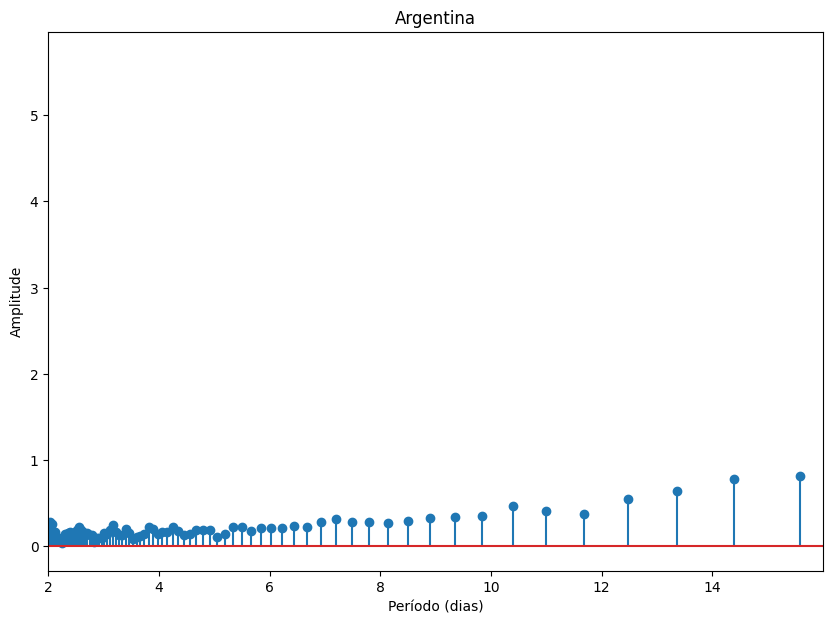

[187.          93.5         62.33333333  46.75        37.4
  31.16666667  26.71428571  23.375       20.77777778  18.7
  17.          15.58333333  14.38461538  13.35714286  12.46666667
  11.6875      11.          10.38888889   9.84210526   9.35
   8.9047619    8.5          8.13043478   7.79166667   7.48
   7.19230769   6.92592593   6.67857143   6.44827586   6.23333333
   6.03225806   5.84375      5.66666667   5.5          5.34285714
   5.19444444   5.05405405   4.92105263   4.79487179   4.675
   4.56097561   4.45238095   4.34883721   4.25         4.15555556
   4.06521739   3.9787234    3.89583333   3.81632653   3.74
   3.66666667   3.59615385   3.52830189   3.46296296   3.4
   3.33928571   3.28070175   3.22413793   3.16949153   3.11666667
   3.06557377   3.01612903   2.96825397   2.921875     2.87692308
   2.83333333   2.79104478   2.75         2.71014493   2.67142857
   2.63380282   2.59722222   2.56164384   2.52702703   2.49333333
   2.46052632   2.42857143   2.3974359    2.36708861  

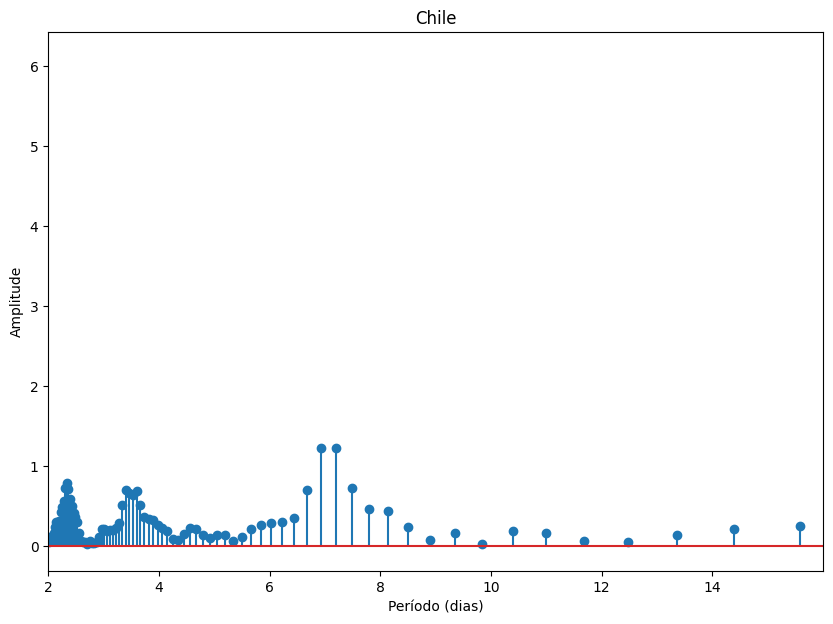

[187.          93.5         62.33333333  46.75        37.4
  31.16666667  26.71428571  23.375       20.77777778  18.7
  17.          15.58333333  14.38461538  13.35714286  12.46666667
  11.6875      11.          10.38888889   9.84210526   9.35
   8.9047619    8.5          8.13043478   7.79166667   7.48
   7.19230769   6.92592593   6.67857143   6.44827586   6.23333333
   6.03225806   5.84375      5.66666667   5.5          5.34285714
   5.19444444   5.05405405   4.92105263   4.79487179   4.675
   4.56097561   4.45238095   4.34883721   4.25         4.15555556
   4.06521739   3.9787234    3.89583333   3.81632653   3.74
   3.66666667   3.59615385   3.52830189   3.46296296   3.4
   3.33928571   3.28070175   3.22413793   3.16949153   3.11666667
   3.06557377   3.01612903   2.96825397   2.921875     2.87692308
   2.83333333   2.79104478   2.75         2.71014493   2.67142857
   2.63380282   2.59722222   2.56164384   2.52702703   2.49333333
   2.46052632   2.42857143   2.3974359    2.36708861  

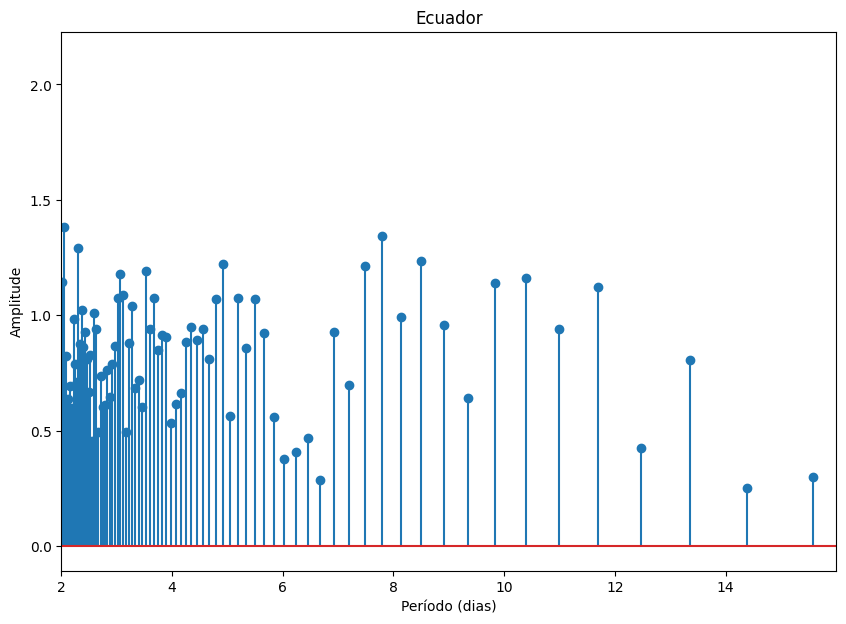

[187.          93.5         62.33333333  46.75        37.4
  31.16666667  26.71428571  23.375       20.77777778  18.7
  17.          15.58333333  14.38461538  13.35714286  12.46666667
  11.6875      11.          10.38888889   9.84210526   9.35
   8.9047619    8.5          8.13043478   7.79166667   7.48
   7.19230769   6.92592593   6.67857143   6.44827586   6.23333333
   6.03225806   5.84375      5.66666667   5.5          5.34285714
   5.19444444   5.05405405   4.92105263   4.79487179   4.675
   4.56097561   4.45238095   4.34883721   4.25         4.15555556
   4.06521739   3.9787234    3.89583333   3.81632653   3.74
   3.66666667   3.59615385   3.52830189   3.46296296   3.4
   3.33928571   3.28070175   3.22413793   3.16949153   3.11666667
   3.06557377   3.01612903   2.96825397   2.921875     2.87692308
   2.83333333   2.79104478   2.75         2.71014493   2.67142857
   2.63380282   2.59722222   2.56164384   2.52702703   2.49333333
   2.46052632   2.42857143   2.3974359    2.36708861  

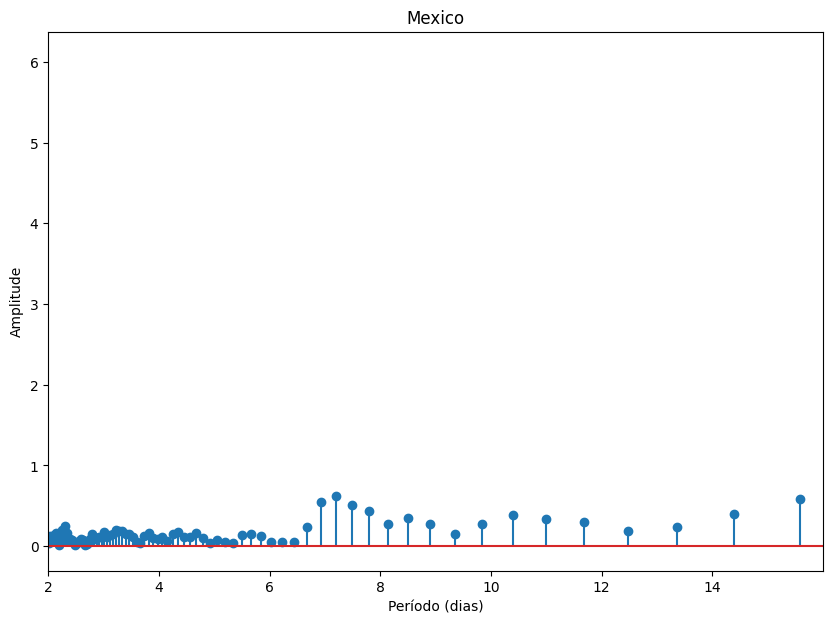

[187.          93.5         62.33333333  46.75        37.4
  31.16666667  26.71428571  23.375       20.77777778  18.7
  17.          15.58333333  14.38461538  13.35714286  12.46666667
  11.6875      11.          10.38888889   9.84210526   9.35
   8.9047619    8.5          8.13043478   7.79166667   7.48
   7.19230769   6.92592593   6.67857143   6.44827586   6.23333333
   6.03225806   5.84375      5.66666667   5.5          5.34285714
   5.19444444   5.05405405   4.92105263   4.79487179   4.675
   4.56097561   4.45238095   4.34883721   4.25         4.15555556
   4.06521739   3.9787234    3.89583333   3.81632653   3.74
   3.66666667   3.59615385   3.52830189   3.46296296   3.4
   3.33928571   3.28070175   3.22413793   3.16949153   3.11666667
   3.06557377   3.01612903   2.96825397   2.921875     2.87692308
   2.83333333   2.79104478   2.75         2.71014493   2.67142857
   2.63380282   2.59722222   2.56164384   2.52702703   2.49333333
   2.46052632   2.42857143   2.3974359    2.36708861  

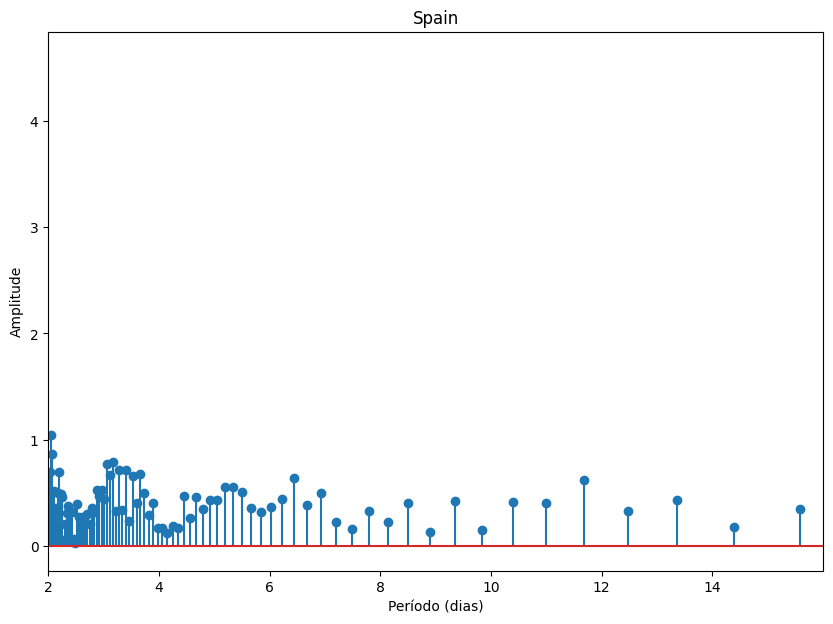

In [127]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.fft import rfft, rfftfreq

def fourier(dt, title=None):
    nobs = len(dt)

    y = np.array(dt)
    y = preprocessing.normalize([y])
    y = np.squeeze(y)

    y_fft = np.abs(rfft(y))
    y_fft = y_fft[1:]

    frequencia = rfftfreq(nobs, d=1)
    frequencia = frequencia[1:]

    periodo = 1 / frequencia
    print(periodo)

    periodo = np.flip(periodo)
    y_fft = np.flip(y_fft)

    plt.figure(figsize=(10, 7))
    plt.stem(periodo[:150], y_fft[:150])    
    plt.xlabel('Período (dias)')
    plt.xlim(2, 16)
    plt.xticks(ticks=np.arange(2, 16, 2),
               labels=np.arange(2, 16, 2))
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

for country in covid_data['Country/Region'].unique():
    dt = covid_data.loc[covid_data['Country/Region'] == country]['DailyCases'].dropna()
    fourier(dt, title=country)

In [128]:
dtf = dt

(2020.0, 2020.509589041096)

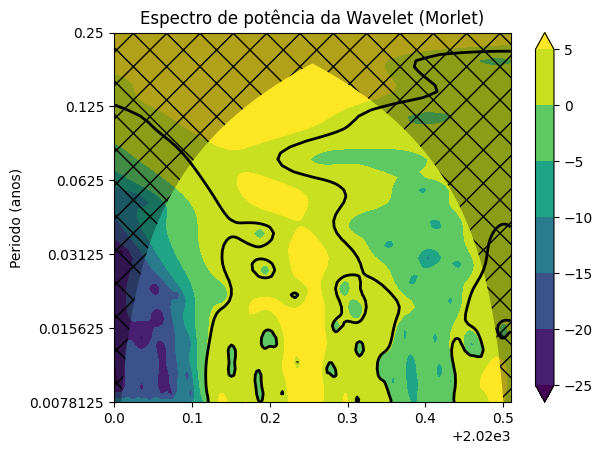

In [129]:
import pycwt as wavelet
from pycwt.helpers import find
import numpy as np

n_registros = len(dtf)    # Quantidade de registros da série
dat = np.array(dtf) # Valores da série
t0 = dtf.index.year[0]    # Ano inicial da série
dt = 1/365                       # Intervalo de tempo em anos. Aqui os dados são mensais por isto dt é igual a 1/12
t = np.arange(0, n_registros) * dt + t0  # Tempo
# Remoção de tendência e normalização da série
p = np.polyfit(t - t0, dat, 1) # utilizado para remover a tendência
dat_notrend = dat #- numpy.polyval(p, t - t0) # remoção do sinal de tendência

# Normalização
std = dat_notrend.std()  # Desvio padrão
var = std ** 2           # Variância
dat_norm = dat_notrend / std  # Dados normalizado
mother = wavelet.Morlet()
s0 = 2 * dt  # Escala inicial deve ser no mínimo igual a duas vezes o intervalo de tempo neste caso 2 meses.
dj = 1 / 12  # Doze sub-oitavas por oitavas
J = 6 / dj   # Seis potências de dois com dj sub-oitavas
alpha, _, _ = wavelet.ar1(dat_norm)  # Autocorrelação Lag-1 para ruído vermelho
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J, mother)
power = (np.abs(wave)) ** 2
power /= scales[:, None]
period = 1 / freqs
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, 
                                         alpha,                
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, n_registros]) * signif[:, None]
sig95 = power / sig95
plt.contourf(t,
             np.log2(period),
             np.log2(power),
             extend='both',
             cmap=plt.cm.viridis)
plt.colorbar()
extent = [t.min(), t.max(), 0, max(period)]
plt.contour(t,
            np.log2(period),
            sig95, 
            [-99, 1], 
            colors='k', 
            linewidths=2, 
            extent=extent)
plt.fill(np.concatenate([t,
                         t[-1:] + dt, 
                         t[-1:] + dt, 
                         t[:1] - dt,
                         t[:1] - dt]),
         np.concatenate([np.log2(coi), 
                         [1e-9], 
                         np.log2(period[-1:]),
                         np.log2(period[-1:]), 
                         [1e-9]]),
         'k', alpha=0.3, hatch='x')
plt.title('Espectro de potência da Wavelet ({})'.format(mother.name))
plt.ylabel('Periodo (anos)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), 
           Yticks)
plt.ylim(np.log2(Yticks)[0],
         np.log2(Yticks)[-1])
plt.xlim(t[0], t[-1])

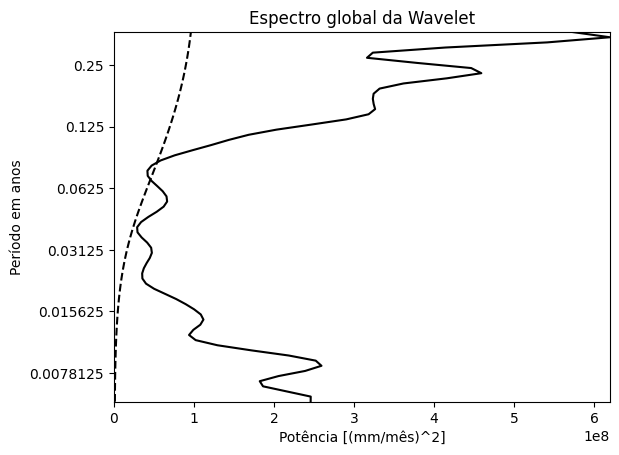

In [130]:
# Cálculo do espectro global de potência
glbl_power = power.mean(axis=1)
dof = len(dat) - scales  # Correção de preenchimento nas bordas
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95,
                                        dof=dof,
                                        wavelet=mother)

# Plot do gráfico do espectro global de potência
plt.plot(glbl_signif, np.log2(period), 'k--')
plt.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
plt.title('Espectro global da Wavelet')
plt.xlabel(r'Potência [({})^2]'.format('mm/mês'))
plt.xlim([0, np.max((var * glbl_power))])
plt.ylim(np.log2([period.min(), period.max()]))
plt.yticks(np.log2(Yticks), Yticks)
plt.ylabel('Período em anos')
plt.show()